# Gradient Descent Equations

Boise State University\
Department of Computer Science\
CS 334 Algorithms of Machine Learning\
Conrad Kennington\
Fall 2020

### First... the cost function for Linear Regression

Given a sequence of points,  yi , and a sequence of points predicted by our model,  ŷ i , RSS is:

 $$ \text{error}_{(m, b)} = \sum_{i=1}^n(y_i - \hat{y_i}) $$

Our objective is to minimize this value. Inserting our linear regression model in for the  ŷ i  predictions, and assuming (for the sake of simplicty) that we're doing regression on only one variable, we get:

$$ \text{RSS} = \sum_{i=1}^n (y_i - (m x_i + b))^2 $$

Where  b  is the intercept and  m  is the slope of the line of best fit. RSS = Residual Sum of Squares

### Now we need to take the gradient. 

Since this is an equation of two variables ( b  and  m ) the gradient will consist of two partial derivatives. Hence the gradient is:

$$ \Big< \frac{\partial}{\partial b}(\text{RSS}),  \frac{\partial}{\partial m}(\text{RSS}) \Big> = 
\Big< -2\sum_{i=1}^n(y_i - (mx_i + b)), -2\sum_{i=1}^n x_i(y_i - (mx_i +b)) \Big> $$

To solve, take a step in the negative gradient direction every iteration. Eventually we will have something that converges.

Let's implement and test this (note that for the implementation we'll actually use MSE, mean squared error. MSE is just RSS divided by the number of points, n. Makes for easier inputs for an iterative approach.

In [30]:
import numpy as np

class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, X, y):
        # Start in a random place... why not y = 5x + 0
        b = 0 # y intercept starts at 0
        m = 5 # Slope starts with going up 5, over 1
        
        n = X.shape[0] # Get the number of points        
        # Loop over the number of iterations it takes to find the lowest cost (best fit)
        for _ in range(self.iterations):
            # The whole result is negative because we want to follow the cost function down to the bottom
            b_gradient = -2 * np.sum(y - (m * X) + b) / n # derivative of the cost of the y intercept
            m_gradient = -2 * np.sum(X * (y - ((m * X) + b))) / n # derivative of the cost of the LR slope
            #print("m_gradient {}".format(m_gradient))
            
            # this is the "gradent descent" algorithm:
            # theta1 = theta0 - (alpha * f'(theta))   ...or:
            # next step = current position +- (learning rate * direction of fastest increase)
            b = b + (self.learning_rate * b_gradient) # update intercept
            m = m - (self.learning_rate * m_gradient) # update slope
            

        self.m, self.b = m, b # Done. Save for later
        
    def predict(self, X):
        return self.m*X + self.b # return values for y = mX + b

That's all we need! OK, let's see how this performs on some example data. We'll generate a cloud of points that's normally distributed around the line  y=x , and see what our algorithm cooks up.

In [33]:
np.random.seed(58)
# This generates random numbers in two numpy arrays, and sorts them so they appear to have a linear relationship
X = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5)
y = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25)

step 0.16349160507220925
step 0.13826973710211996
step 0.11619274097097143
step 0.09688932534343007
step 0.08003131444258861
step 0.06532866760653053
step 0.05252507318011787
step 0.04139405054712349
step 0.0317355017357456
step 0.023372660779514946
step 0.016149394986904934
step 0.009927817556194858
step 0.00458617564659572
step 1.6982152474536517e-05
step -0.003874636913228658
step -0.007172404282693496
step -0.00995018453579098
step -0.012273127898851814
step -0.01419868195454576
step -0.015777486493779053
step -0.017054164985132
step -0.018068024584252305
step -0.01885367523148392
step -0.01944157717022347
step -0.019858525142811292
step -0.020128076569036684
step -0.02027093017028552
step -0.020305260757343114
step -0.02024701524070649
step -0.02011017433906357
step -0.019906983945609774
step -0.01964815965535029
step -0.019343067552626797
step -0.018999884000747747
step -0.01862573685942785
step -0.018226830276008656
step -0.017808554948939476
step -0.01737558554303054
step -0.01

Text(0.5, 1.0, 'Gradient Descent Linear Regressor')

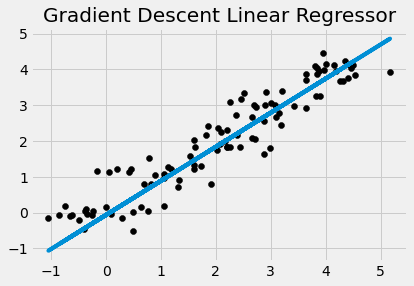

In [34]:
clf = GradientDescentLinearRegression()
clf.fit(X, y)

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # Replicates style of FiveThirtyEight.com, a polling website

plt.scatter(X, y, color='black') # plot data points
plt.plot(X, clf.predict(X)) # plot calculated line
plt.gca().set_title("Gradient Descent Linear Regressor")

The biggest advantage gradient descent has is that it requires no knowledge whatsoever of the fundamentals of the model. We can apply the classifier we've built without knowing anything about linear regression. Instead we just pick a metric, compute its derivative, and then use a computer to iterate to a solution.

This is wasteful for simple ordinary least squares, because we have a way of solving this already, sure. But for most machine learning problems, calculating and plotting the entire cost curve is intractable.

A gradient descent solution to modeling can be applied to any model metric, so long as the metric has two properties: it's differentiable (most things are) and concave. Concavity is the property that no matter where you are on the metric surface, the derivative will point towards a point with better "fit", right up until you get to the bottom of the thing.

There are many, many ways in which this process can be optimized, generalized, and tweaked, most of which find their way into practical ML. There's also a whole mathematical subfield, convex optimization, concerned with this very practical problem space.